<a href="https://colab.research.google.com/github/henriquebap/Machine_Learning_HB/blob/main/Carpole-DQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinamento Avancado do agente `CartPole`
## Reinforcement Learning utilizando o algoritmo DEep Q-Network (DQN) para aprender a equilibrar o poste no ambiente `CartPole`.
---
## Primeira versao e aprendendo a manipular parametros, gerenciar epochsde aprendizado e treinar em escala.
----
## Conceitos basicos de DQN
- Estados (States): Representações da situação atual do ambiente.
- Ações (Actions): Movimentos que o agente pode executar (p.ex., mover o carrinho para a esquerda ou direita).
- Recompensas (Rewards): Feedback recebido após executar uma ação, indicando a eficácia da ação.
- Política (Policy): Estratégia pela qual o agente seleciona ações com base nos estados.
- Função de Valor (Value Function): Avalia a qualidade das ações em estados específicos para maximizar as recompensas futuras.
---

### Codigo
- o Codigo de certa forma esta funcional, mas ainda ha muito que aprender e estudar sobre. existem varias versoes juntas e misturadas no ambiete, mas a ultima versao funcional nao esta comentada.

In [37]:
!apt-get install -y xvfb python3-opengl ffmpeg
!pip install gym==0.23.1 stable-baselines3[extra]~=1.2.0 matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-opengl is already the newest version (3.1.5+dfsg-1).
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.10).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [77]:
import gym
import numpy as np
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import os

# Função para criar ambiente monitorado
def make_env():
    env = gym.make('CartPole-v1')
    env = Monitor(env)
    return env

# Função para visualizar múltiplos episódios
def plot_cartpole_episodes(env, model, num_episodes=5, save_path='cartpole_episodes.mp4'):
    all_frames = []
    for episode in range(num_episodes):
        frames = []
        obs = env.reset()
        done = False
        while not done:
            frames.append(env.render(mode='rgb_array'))
            action, _states = model.predict(obs)
            obs, reward, done, info = env.step(action)
        all_frames.append(frames)

    def update_scene(num, all_frames, patch):
        episode, frame = divmod(num, len(all_frames[0]))
        patch.set_data(all_frames[episode][frame])
        return patch,

    fig = plt.figure()
    patch = plt.imshow(all_frames[0][0])
    plt.axis('off')
    ani = animation.FuncAnimation(fig, update_scene, fargs=(all_frames, patch),
                                  frames=sum(len(frames) for frames in all_frames), repeat=False)

    # Save animation to file
    writer = animation.FFMpegWriter(fps=30, codec='libx264')
    ani.save(save_path, writer=writer)


    return ani

In [88]:
# Envolver o ambiente com DummyVecEnv
env = DummyVecEnv([make_env])

# Criar e treinar o modelo DQN
model = DQN('MlpPolicy', env, verbose=0)
model.learn(total_timesteps=105000)

# Avaliar o agente
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=5)
print(f"Mean reward: {mean_reward} +/- {std_reward}")

Mean reward: 144.2 +/- 19.415457759218555


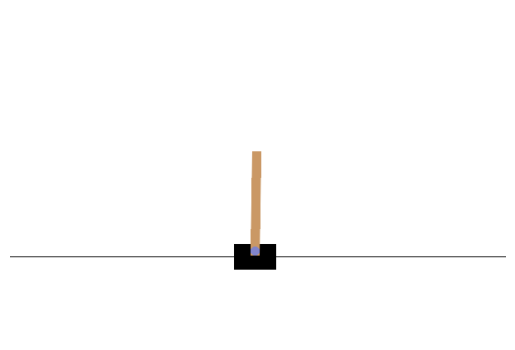

In [80]:
# Visualizar um episódio
env = make_env()  # Criar um ambiente para visualização, sem DummyVecEnv
ani = plot_cartpole_episodes(env, model, num_episodes=1, save_path='cartpole_single_episode.mp4')
HTML(ani.to_jshtml())

### Tentativa de salvar o modelo e carregar e treinar em cima de algo existente para evoluir o modelo

In [ ]:
# env = DummyVecEnv([make_env])
# # Define the model path
# model_path = "dqn_cartpole_model"
# should_train = True

# # Load or create the model
# if os.path.exists(model_path + ".zip"):
#     model = DQN.load(model_path, env)
#     print("Modelo carregado.")
# else:
#     model = DQN('MlpPolicy', env, verbose=1)
#     print("Novo modelo criado.")

# if should_train:
#     # Treinar o modelo DQN
#     model.learn(total_timesteps=105000)
#     # Salvar o modelo
#     model.save(model_path)
#     print("Modelo treinado e salvo.")

# # Avaliar o agente
# mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=5)
# print(f"Mean reward: {mean_reward} +/- {std_reward}")
